## Notebook imports and Packages

In [43]:
import matplotlib.pyplot as plt
import numpy as np        
from matplotlib import cm
import math
from sympy import symbols, diff

### Example 1 - Simple cost function 

$f(x) = x^2 +x+1$

In [2]:
def f(x):
    return x**2 + x + 1

#Make data

x_1 = np.linspace(-3,3,500)

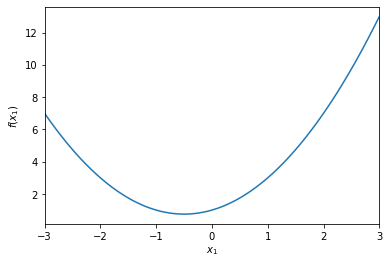

In [3]:
plt.plot(x_1, f(x_1))
plt.xlim(-3,3)
plt.xlabel('$x_1$')
plt.ylabel('$f (x_{1})$')
plt.show()


Slope and derivatives

In [4]:
#First approach define the derivative
def df(x):
    return 2*x+1


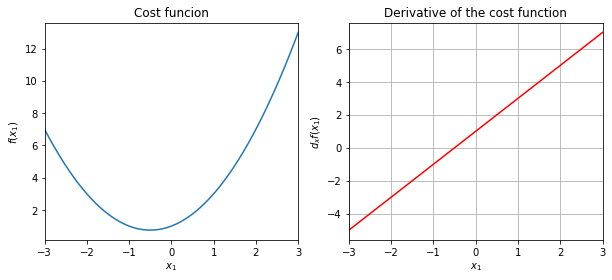

In [5]:
plt.figure(figsize=[10,4])

#First chart:Cost function
plt.subplot(1,2,1)

plt.plot(x_1, f(x_1))
plt.title('Cost funcion')
plt.xlim(-3,3)
plt.xlabel('$x_1$')
plt.ylabel('$f (x_{1})$')

#Second chart: Derivative of the cost function
plt.subplot(1,2,2)
plt.plot(x_1, df(x_1), c='r')
plt.title('Derivative of the cost function')
plt.grid()
plt.xlim(-3,3)
plt.xlabel('$x_1$')
plt.ylabel('$d_{x}f (x_{1})$')

plt.show()


In [6]:
#Making gradient descent 
new_x = 3
previous_x = 0
learning_rate = 0.1

for n in range(5000):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - learning_rate*gradient

print(f'Local minimun at: {new_x}')
print(f'df(x) at this point is : {df(new_x)}')
print(f'Cost at this point: {f(new_x)}')

Local minimun at: -0.4999999999999999
df(x) at this point is : 2.220446049250313e-16
Cost at this point: 0.75


In [7]:
new_x = 3
previous_x = 0
learning_rate = 0.1
precision1 = 0.00001

x_list = [new_x]

slope_list = [df(new_x)]

for n in range(100):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - learning_rate*gradient
    step_size = abs(new_x - previous_x)
    x_list.append(new_x)
    slope_list.append(df(new_x))

    if step_size < precision1:
        print(f'Loop ran this many times: {n}')
        break

print(f'Local minimun at: {new_x}')
print(f'df(x) at this point is : {df(new_x)}')
print(f'Cost at this point: {f(new_x)}')

Loop ran this many times: 50
Local minimun at: -0.49996003706460423
df(x) at this point is : 7.992587079153068e-05
Cost at this point: 0.7500000015970362


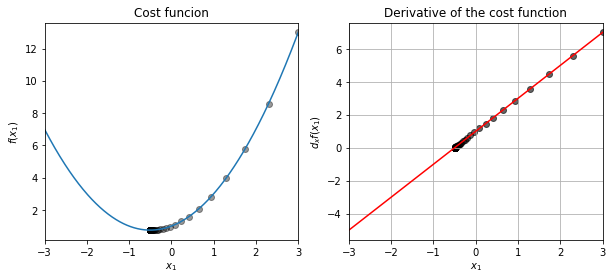

In [8]:
#Plot the gradient descent calculations on 
plt.figure(figsize=[10,4])

#First chart:Cost function
plt.subplot(1,2,1)

values = np.array(x_list)
plt.title('Cost funcion')
plt.xlim(-3,3)
plt.xlabel('$x_1$')
plt.ylabel('$f (x_{1})$')
plt.plot(x_1, f(x_1))
plt.scatter(x_list, f(values), color ='black', alpha=0.4 )

#Second chart: Derivative of the cost function
plt.subplot(1,2,2)
plt.plot(x_1, df(x_1), c='r')
plt.title('Derivative of the cost function')
plt.grid()
plt.xlim(-3,3)
plt.xlabel('$x_1$')
plt.ylabel('$d_{x}f (x_{1})$')
plt.scatter(x_list, slope_list, color ='black', alpha=0.6 )

plt.show()


In [9]:
#Loop exercise
def sing(num_bottles):
    l0=[]
    for i in range(num_bottles,0,-1):
        l0.append(f'{i} bottles of beer on the wall, {i} bottles of beer.')
    return l0
    
    
sing(99)

['99 bottles of beer on the wall, 99 bottles of beer.',
 '98 bottles of beer on the wall, 98 bottles of beer.',
 '97 bottles of beer on the wall, 97 bottles of beer.',
 '96 bottles of beer on the wall, 96 bottles of beer.',
 '95 bottles of beer on the wall, 95 bottles of beer.',
 '94 bottles of beer on the wall, 94 bottles of beer.',
 '93 bottles of beer on the wall, 93 bottles of beer.',
 '92 bottles of beer on the wall, 92 bottles of beer.',
 '91 bottles of beer on the wall, 91 bottles of beer.',
 '90 bottles of beer on the wall, 90 bottles of beer.',
 '89 bottles of beer on the wall, 89 bottles of beer.',
 '88 bottles of beer on the wall, 88 bottles of beer.',
 '87 bottles of beer on the wall, 87 bottles of beer.',
 '86 bottles of beer on the wall, 86 bottles of beer.',
 '85 bottles of beer on the wall, 85 bottles of beer.',
 '84 bottles of beer on the wall, 84 bottles of beer.',
 '83 bottles of beer on the wall, 83 bottles of beer.',
 '82 bottles of beer on the wall, 82 bottles of 

### Example 2: Multiple Minima vs. initilal Guess & Advanced functions

$$g(x) = x^4 -4x^2 + 5 $$

In [10]:
x_2 = np.linspace(-3,3, 1000)

def g(x):
    return x**4 -4*x**2 +5

def dg(x):
    return 4*x**3 -8*x 


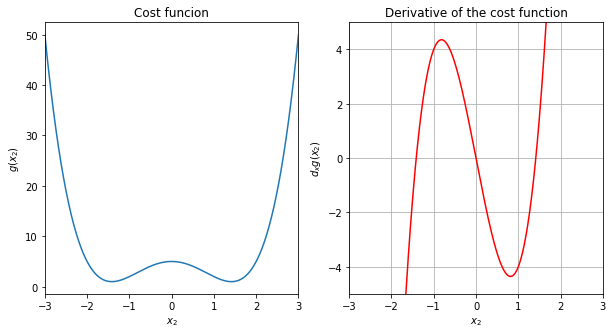

In [11]:
plt.figure(figsize=[10,5])

#First chart:Cost function
plt.subplot(1,2,1)

plt.plot(x_2, g(x_2))
plt.title('Cost funcion')
plt.xlim(-3,3)
plt.xlabel('$x_2$')
plt.ylabel('$g (x_{2})$')

#Second chart: Derivative of the cost function
plt.subplot(1,2,2)
plt.plot(x_2, dg(x_2), c='r')
plt.title('Derivative of the cost function')
plt.grid()
plt.xlim(-3,3)
plt.ylim(-5,5)
plt.xlabel('$x_2$')
plt.ylabel('$d_{x}g (x_{2})$')

plt.show()

Gradient descent as a python function

In [12]:
def gradient_descent(derivative_func, initial_guess, learning, precision):

    new_x = initial_guess

    x_list = [new_x]

    slope_list = [derivative_func(new_x)]

    for n in range(100):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - learning*gradient
        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

It's time to test

In [13]:
local_min, list_x, deriv_list = gradient_descent(dg, 1 ,0.01,0.0001)
print(f'Local min. occurs at: {local_min}')
print(f'Number of steps: {len(list_x)}')

Local min. occurs at: 1.4136995336440676
Number of steps: 43


In [14]:
local_min, list_x, deriv_list = gradient_descent(dg, -1 ,0.01,0.0001)
print(f'Local min. occurs at: {local_min}')
print(f'Number of steps: {len(list_x)}')

Local min. occurs at: -1.4136995336440676
Number of steps: 43


In [15]:
def gradient_descent(derivative_func, initial_guess, learning=0.01, precision=0.0001, max_iter = 300):

    new_x = initial_guess

    x_list = [new_x]

    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - learning*gradient
        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [16]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.1)
print(f'Local min. occurs at: {local_min}')
print(f'Number of steps: {len(list_x)}')

Local min. occurs at: 1.413709226894381
Number of steps: 77


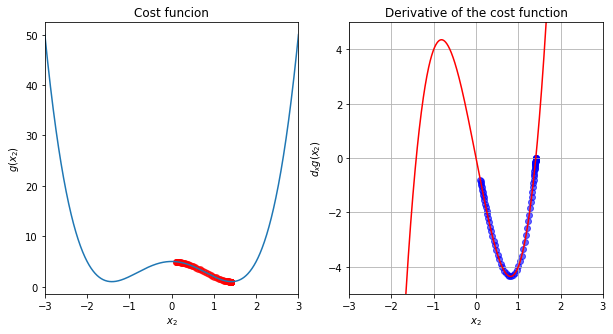

In [17]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.1)
#Time to plot the gradient descent
plt.figure(figsize=[10,5])

#First chart:Cost function
plt.subplot(1,2,1)

plt.plot(x_2, g(x_2))
plt.title('Cost funcion')
plt.xlim(-3,3)
plt.xlabel('$x_2$')
plt.ylabel('$g (x_{2})$')
plt.scatter(list_x, g(np.array(list_x)), c='red', alpha=0.6)

#Second chart: Derivative of the cost function
plt.subplot(1,2,2)
plt.plot(x_2, dg(x_2), c='r')
plt.title('Derivative of the cost function')
plt.grid()
plt.xlim(-3,3)
plt.ylim(-5,5)
plt.xlabel('$x_2$')
plt.ylabel('$d_{x}g (x_{2})$')
plt.scatter(list_x, deriv_list, c='blue', alpha=0.6)

plt.show()

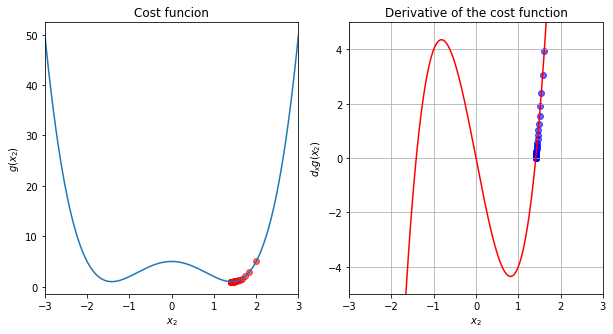

In [18]:
local_min, list_x, deriv_list = gradient_descent(dg, 2)
#Time to plot the gradient descent
plt.figure(figsize=[10,5])

#First chart:Cost function
plt.subplot(1,2,1)

plt.plot(x_2, g(x_2))
plt.title('Cost funcion')
plt.xlim(-3,3)
plt.xlabel('$x_2$')
plt.ylabel('$g (x_{2})$')
plt.scatter(list_x, g(np.array(list_x)), c='red', alpha=0.6)

#Second chart: Derivative of the cost function
plt.subplot(1,2,2)
plt.plot(x_2, dg(x_2), c='r')
plt.title('Derivative of the cost function')
plt.grid()
plt.xlim(-3,3)
plt.ylim(-5,5)
plt.xlabel('$x_2$')
plt.ylabel('$d_{x}g (x_{2})$')
plt.scatter(list_x, deriv_list, c='blue', alpha=0.6)

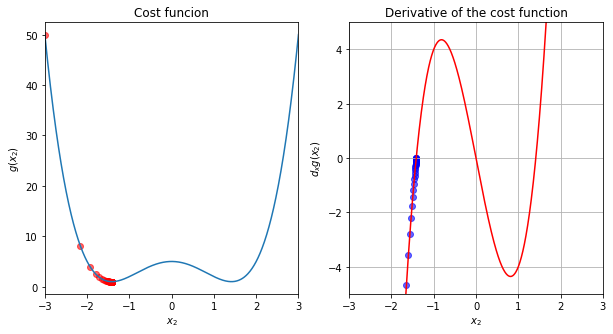

In [19]:
local_min, list_x, deriv_list = gradient_descent(dg, -3)
#Time to plot the gradient descent
plt.figure(figsize=[10,5])

#First chart:Cost function
plt.subplot(1,2,1)

plt.plot(x_2, g(x_2))
plt.title('Cost funcion')
plt.xlim(-3,3)
plt.xlabel('$x_2$')
plt.ylabel('$g (x_{2})$')
plt.scatter(list_x, g(np.array(list_x)), c='red', alpha=0.6)

#Second chart: Derivative of the cost function
plt.subplot(1,2,2)
plt.plot(x_2, dg(x_2), c='r')
plt.title('Derivative of the cost function')
plt.grid()
plt.xlim(-3,3)
plt.ylim(-5,5)
plt.xlabel('$x_2$')
plt.ylabel('$d_{x}g (x_{2})$')
plt.scatter(list_x, deriv_list, c='blue', alpha=0.6)

The initial position of the guess can influence very much the answer of the gradient descent.

At this example the cost minimun was the same number of $g(x)$, but this will not be the case always (Global minimun & local minimun).

What if DG diverges?
### Example 3 - Divergence, Overflow

$$ h(x) = x^5 - 2x^4 +2$$ 

In [20]:
x_3 = np.linspace(-2.5, 2.5, 1000)

def h(x):
    return x**5 - 2*x**4 +2

def dh(x):
    return 5*x**4 - 8*x**3

Local min. occurs at: 1.5996556725226643
Cost at this min. is: -0.6214387864536057
Number of steps: 77


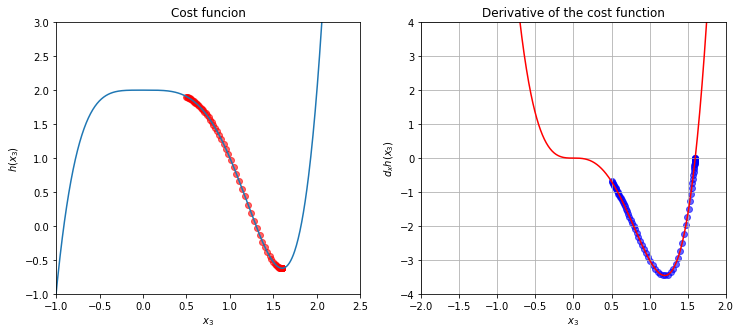

In [21]:
local_min, list_x, deriv_list = gradient_descent(dh, 0.5)
#Time to plot the gradient descent
plt.figure(figsize=[12,5])

#First chart:Cost function
plt.subplot(1,2,1)

plt.plot(x_3, h(x_3))
plt.title('Cost funcion')
plt.xlim(-1,2.5)
plt.ylim(-1,3)
plt.xlabel('$x_3$')
plt.ylabel('$h (x_{3})$')
plt.scatter(list_x, h(np.array(list_x)), c='red', alpha=0.6)

#Second chart: Derivative of the cost function
plt.subplot(1,2,2)
plt.plot(x_3, dh(x_3), c='r')
plt.title('Derivative of the cost function')
plt.grid()
plt.xlim(-2,2)
plt.ylim(-4,4)
plt.xlabel('$x_3$')
plt.ylabel('$d_{x}h (x_{3})$')
plt.scatter(list_x, deriv_list, c='blue', alpha=0.6)

print(f'Local min. occurs at: {local_min}')
print(f'Cost at this min. is: {h(local_min)}')
print(f'Number of steps: {len(list_x)}')

In [22]:
data_tuple = gradient_descent(dh, 0.3)
print(f'local min. is: {data_tuple[0]}')

local min. is: 1.5996673376265471


### The learning rate


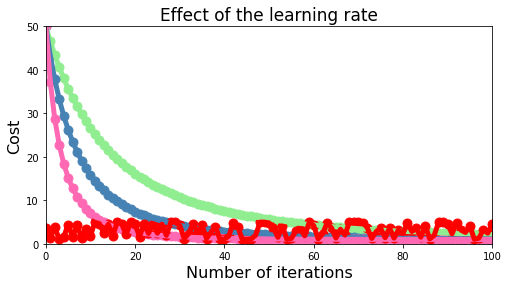

In [23]:
# Run gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                learning=0.0005, precision=0.0001, max_iter=n)

# Challenge: Plot two more learning rates: mid_gamma (0.001) and high_gamma(0.002)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                learning=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                learning=0.002, precision=0.0001, max_iter=n)

# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                learning=0.25, precision=0.0001, max_iter=n)


# Plotting reduction in cost for each iteration
plt.figure(figsize=[8, 4])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Number of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# Plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', s=80)

# Plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink', s=80)

# Plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=80)


plt.show()

### Example 4: Data viz with 3D plots

$$ f(x,y) = \frac{1}{3^{-x^2-y^2} +1} $$

In [24]:
def f(x,y):
    r = 3**(-x**2-y**2)
    return 1 / (r +1)
    

In [25]:
#Make the data for x and y

x_4 = np.linspace(-2, 2, 200)

y_4 = np.linspace(-3,3, 200)

In [26]:
x_4, y_4 = np.meshgrid(x_4, y_4)

In [27]:
print(x_4.shape)

(200, 200)


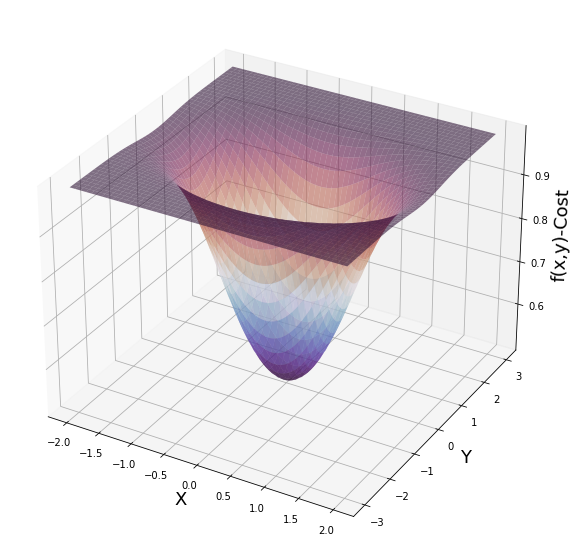

In [50]:
#Generating 3D plot
fig = plt.figure(figsize=[12,10])
ax = fig.add_subplot(projection = '3d')

ax.set_xlabel('X', fontsize = 18)
ax.set_ylabel('Y', fontsize = 18)
ax.set_zlabel('f(x,y)-Cost', fontsize = 18)
ax.plot_surface(x_4, y_4, f(x_4,y_4), cmap=cm.twilight_shifted, alpha= 0.6)

plt.show()

### Partial derivatives & Symbolic computation

$$ \frac{\partial f }{\partial x} = \frac{2 x \ln(3) \cdot 3^{-x^2 - y^2} }{(3^{-x^2 - y^2} + 1)^2}$$

$$ \frac{\partial f }{\partial y} = \frac{2 y \ln(3) \cdot 3^{-x^2 - y^2} }{(3^{-x^2 - y^2} + 1)^2}$$

In [29]:
a, b = symbols('x, y')
print(f' The cost function f is: {f(a,b)}')

diff(f(a,b), a)

 The cost function f is: 1/(3**(-x**2 - y**2) + 1)


2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

In [39]:
diff(f(a,b), b)


2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2

In [37]:
print(f'Value of f at x = 1.8 y = 1.0: {f(a,b).evalf(subs = {a:1.8,b:1.0})}')

Value of f at x = 1.8 y = 1.0: 0.990604794032582


In [32]:
diff(f(a,b), a).evalf(subs={a:1.8, b:1.0})

0.0368089716197505

### Gradient Descent with SymPy

In [46]:
learning = 0.1
max_iter = 350
params = np.array([1.8, 1.0]) #Initial guess [x = 1.8, y = 1.0]

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b: params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b: params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params- learning * gradients
    if n % 50 == 0:
        print(params)

[1.79631910283802 0.997955057132236]
[1.44904548163609 0.805025267575604]
[0.213169964033646 0.118427757796470]
[0.0126486429683746 0.00702702387131922]
[0.000750289177175265 0.000416827320652925]
[4.45054737219133e-5 2.47252631788407e-5]
[2.63996503144164e-6 1.46664723968980e-6]


In [34]:
print(f'Minimun occurs at x = {gradient_x}')
print(f'Minimun occurs at y = {gradient_y}')
print(f'The cost is: {f(gradient_x,gradient_y)}')

Minimun occurs at x = 9.63096905842152E-8
Minimun occurs at y = 5.35053836578974E-8
The cost is: 0.500000000000003


This is to look how fast is without sympy

In [44]:
def fpx(x,y):
     r = 3**(-x**2 - y**2)
     return 2*r*x*math.log(3)/(r + 1)**2

def fpy(x,y):
     r = 3**(-x**2 - y**2)
     return 2*r*y*math.log(3)/(r + 1)**2
    

In [45]:
learning = 0.1
max_iter = 350
params = np.array([1.8, 1.0]) #Initial guess [x = 1.8, y = 1.0]

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params- learning * gradients
    if n % 50 == 0:
        print(params)

[1.7963191  0.99795506]
[1.44904548 0.80502527]
[0.21316996 0.11842776]
[0.01264864 0.00702702]
[0.00075029 0.00041683]
[4.45054737e-05 2.47252632e-05]
[2.63996503e-06 1.46664724e-06]


### Graphing 3D GD

In [58]:
learning = 0.1
max_iter = 350
params = np.array([2, 1.0]) #Initial guess [x = 1.8, y = 1.0]
values_array = params.reshape(1,2)

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params- learning * gradients
    #values_array = np.append(values_array, params.reshape(1,2), axis=0) 
    values_array = np.concatenate((values_array, params.reshape(1,2)),axis=0)
    if n % 50 == 0:
        print(params)

[1.99820638 0.99910319]
[1.88023825 0.94011913]
[1.6206564 0.8103282]
[0.43355639 0.2167782 ]
[0.02584125 0.01292062]
[0.00153285 0.00076642]
[9.09249343e-05 4.54624671e-05]


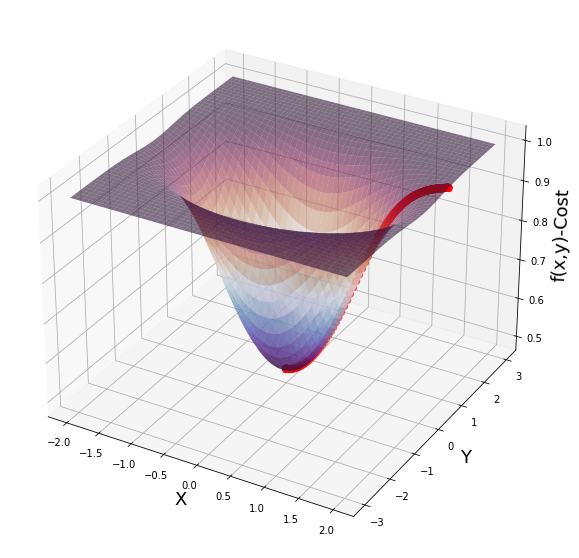

In [59]:
#Generating 3D plot
fig = plt.figure(figsize=[12,10])
ax = fig.add_subplot(projection = '3d')

ax.set_xlabel('X', fontsize = 18)
ax.set_ylabel('Y', fontsize = 18)
ax.set_zlabel('f(x,y)-Cost', fontsize = 18)
ax.plot_surface(x_4, y_4, f(x_4,y_4), cmap=cm.twilight_shifted, alpha= 0.6)
ax.scatter(values_array[:,0],values_array[:,1], 
f(values_array[:,0],values_array[:,1]), s=50, c='red')

plt.show()

### Example 5: Working with Data & Real cost Function

MSE: A cost function for regression problems
$$  MSE = \frac{1}{N} \sum^{N}_{i=1} (y^{(i)}-\hat{y}^{(i)})  $$